In [9]:
from typing import TypedDict, Literal, Union

from langgraph.graph import StateGraph, END

class AgentState(TypedDict):
    result: Union[int, float]
    number_1: int
    number_2: int
    operation: Literal["+", "-", "*", "/"]

def add(state: AgentState) -> AgentState:
    state["result"] = state["number_1"] + state["number_2"]
    return state

def subtract(state: AgentState) -> AgentState:
    state["result"] = state["number_1"] - state["number_2"]
    return state


def multiply(state: AgentState) -> AgentState:
    state["result"] = state["number_1"] * state["number_2"]
    return state

def divide(state: AgentState) -> AgentState:
    # Validation: prevent division by zero
    if state["number_2"] == 0:
        raise ValueError("Cannot divide by zero")
    
    # Safe division
    state["result"] = state["number_1"] / state["number_2"]
    return state

def get_operation(state: AgentState) -> str:
    if state["operation"] == "+":
        return "add_operation"
    elif state["operation"] == "-":
        return "subtract_operation"
    elif state["operation"] == "*":
        return "multiply_operation"
    elif state["operation"] == "/":
        return "divide_operation"
    return "add"



graph = StateGraph(AgentState)
graph.add_node("add", add)
graph.add_node("divide", divide)
graph.add_node("subtract", subtract)
graph.add_node("multiply", multiply)
graph.add_node("router", lambda state: state)

graph.set_entry_point("router")

graph.add_conditional_edges("router", get_operation, {
    "add_operation": "add",
    "subtract_operation": "subtract",
    "multiply_operation": "multiply",
    "divide_operation": "divide"
}, END)



app = graph.compile()

app.invoke({"number_1": 10, "number_2": 5, "operation": "/"})

{'result': 2.0, 'number_1': 10, 'number_2': 5, 'operation': '/'}

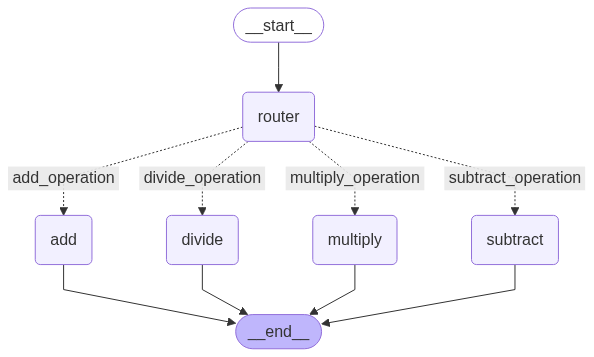

In [10]:
from IPython.display import Image, display


display(Image(app.get_graph().draw_mermaid_png()))